# ISJ - Introduction to Python

## Based on:
- https://github.com/rick446/fasttrack-python


## Based on:
- Ned Batchelder: Facts and Myths about Python names and values (PyCon US 2015) 
- Brandon Rhodes: All Your Ducks In A Row: Data Structures in the Standard Library and Beyond (PyCon US 2014)


## Worth to see others from:  
- https://github.com/s16h/py-must-watch
- http://pyvideo.org/

## Today's topics
- Mutable and immutable structures
- What are the names?
- Everything is an object

In [ ]:
#https://github.com/python/cpython/blob/main/Include/object.h

struct _object {
    _PyObject_HEAD_EXTRA
    Py_ssize_t ob_refcnt;
    PyTypeObject *ob_type;
};

## Did you understand the message?
... of Ned Batchelder's presentation Facts and Myths about Python names and values (PyCon US 2015)

In [ ]:
x = 5000
backup_x = x
x = x + 1
print(x)
print(backup_x)

In [ ]:
x = [5,6,7]
backup_x = x
x.append(8)
print(x)

In [ ]:
print(backup_x)

In [ ]:
a = 1000
a = 2000 
# I thought int was immutable,
# but I just changed it?!


In [ ]:
x = 5000  # ints are immutable
backup_x = x
x = x + 1 # 5000 can't be mutated, we are creating a new object here
print(x)
print(backup_x)

In [ ]:
# this is C
int* a;
int *b;
*a = 5;
b = a;
*a = 10;

In [ ]:
a = 10000
print(id(a))
a += 345 # just an abbreviation for a=a+345
print(a)
print(id(a))

# What are the reasons for immutability?

https://stackoverflow.com/questions/37535694/why-are-integers-immutable-in-python

## Memory

- **Saves memory** If it's well known that an object is immutable, it can be easily copied creating a new reference to the same object.

- **Performance** Python can allocate space for an immutable object at creation time, and the storage requirements are fixed and unchanging.

## Fast execution

- It doesn't have to copy each part of the object, only a simple reference.
- Easy to be compared, comparing equality by reference is faster than comparing values.

## Security
- In Multi-threading app, different threads can interact with data contained inside the immutable objects, without to worry about data consistency.
- The internal state of your program will be consistent even if you have exceptions.
- Classes should be immutable unless there's a very good reason to make them mutable....If a class cannot be made immutable, limit its mutability as much as possible

## Ease to use
- Is easier to read, easier to maintain and less likely to fail in odd and unpredictable ways.
- Immutable objects are easier to test, due not only to their easy mockability, but also the code patterns they tend to enforce.

## Keys must be immutable
- You can use strings, numbers or tuples as dictionary key. This is something that you want to use.

In [ ]:
x = [5,6,7]
backup_x = x[:]

x.append(8)
print(x)
print(backup_x)

https://www.pythonmorsels.com/topics/pointers/

In [ ]:
a = 'abcd'
print(id(a))
a += 'efg' # just an abbreviation for a=a+'efg'
print(a)
print(id(a))

In [ ]:
s26 = 'abcdefghijklmnopqrstuvwxyz'
res_list = []
for concatenate_times in range(1,1001):
        res_list.append(s26 * concatenate_times)
print(f'{len(res_list)=}')
print(f'{res_list[0]=}')
print(f'{res_list[1]=}')
print(f'{res_list[2]=}')

In [ ]:
%%time
res = ''
for item in res_list:
        res = res + item
print(f'Length of the resulting string: {len(res):,}')
print(f'{(1000+1)*(1000//2)*26=}')

In [ ]:
%%time
res = ', '.join(res_list)
print(f'Length of the resulting string: {len(res):,}')

## Based on:
- https://www.codementor.io/iyanuashiri/what-you-don-t-know-about-python-variables-s5lvipwhn


In system languages, variables may refer to parts of your computer’s memory where you store some information

Python’s variable (name) is a reference to an object created in the computer’s memory

The object can be a String, Integer etc.

In Python, everything is an object

An object has an identity, type and value

The identity of an object never changes

Same with the type of the object

The value of the object can or cannot change, depending on whether it is an immutable object or a mutable object

In [ ]:
name = 'John'
age = 23
curr_year = 2022
print(id(name))
print(id(age))
print(id(curr_year))
print(type(name))
print(type(age))

In Python, objects are first created alongside their type or class and then given an identity

In [ ]:
cal_year = 2022
print(id(curr_year))
academic_year = 2022
print(id(academic_year))
print(cal_year == academic_year)
print(cal_year is academic_year)

In [ ]:
age = 42
print(id(age))
universal_answer = 42
print(id(universal_answer))
print(age == universal_answer)
print(age is universal_answer)

Integers in the range -5 to 256 are created by the CPython interpreter during startup

These integers can then be used whenever you are running your program, thus speeding things up

Hence the id of each of these numbers will always remain the same

In [ ]:
print('256 is 257-1', 256 is 257-1)
print('257 is 258-1', 257 is 258 - 1)
print('-5 is -6+1', -5  is -6+1)
print('-7 is -6-1', -7 is -6-1)

always use "==" for equality, "is" for identity!

In [ ]:
a = 'hello world! hello world!'
b = 'hello world! ' + 'hello world!'
print('a is b,', a is b)
print('a == b,', a == b)

In [ ]:
a = float('nan')
print('a is a,', a is a)
print('a == a,', a == a)

Python `list` is a mutable object

For example, `append` and `extends` methods are modifying the `list` object in place

In [ ]:
a_list = []
print(a_list, '\nID (initial):',id(a_list), '\n')

a_list.append(1)
print(a_list, '\nID (append):',id(a_list), '\n')

a_list.extend([2,3])
print(a_list, '\nID (extend):',id(a_list))

Also, the `+=` operator on a `list` extends it by directly modifying the object  

In [ ]:
a_list = []
print('ID:', id(a_list))

a_list += [1]
print('ID (+=):', id(a_list))

However, if we use the assignment via `my_list = my_list + ...`, we create a new list object, which can be demonstrated by the following code:

In [ ]:
a_list = []
print('ID:', id(a_list))

a_list += [1]
print('ID (+=):', id(a_list))

a_list = a_list + [2]
print('ID (list = list + ...):', id(a_list))

Python `list` is a mutable object

In [ ]:
my_tup = (1,)
print(id(my_tup))
my_tup += (4,5)
print(id(my_tup))
my_tup = my_tup + (6,7)
print(id(my_tup))

In [ ]:
tup = ([1],'a')
print('tup before: ', tup)
tup[0].append('b')
print('tup after: ', tup)

In [ ]:
tup = ([1],'a')
print('tup before: ', tup)
tup[0].extend([2,3])
print('tup after: ', tup)

In [ ]:
tup = ([],)
print('tup before: ', tup)
tup[0] += [1]

In [ ]:
print('tup after: ', tup)

### Explanation

**A. Jesse Jiryu Davis** has a nice explanation for this phenomenon (Original source: [http://emptysqua.re/blog/python-increment-is-weird-part-ii/](http://emptysqua.re/blog/python-increment-is-weird-part-ii/))

If we try to extend the list via `+=` *"then the statement executes `STORE_SUBSCR`, which calls the C function `PyObject_SetItem`, which checks if the object supports item assignment. In our case the object is a tuple, so `PyObject_SetItem` throws the `TypeError`. Mystery solved."*

# Hello, world!

In [ ]:
print("Hello, world!")

In [ ]:
def sayhello():
    print("Hello, world!")

In [ ]:
mysayhello = sayhello
mysayhello()

In [ ]:
def sayhello(name):
    print("Hello, " + name)

In [ ]:
sayhello('Rick')

**Exercise**: Write a “Hello, world” program that uses 
a function with a parameter to greet you by name

In [ ]:
def hello():
    return 'Hello'
def hi():
     return 'Hi'
def aloha():
     return 'Aloha'

In [ ]:
my_list = [hello(), hi(), aloha()]
print(my_list)

In [ ]:
my_list = [hello, hi, aloha]
greeting = 'hi'
print(my_list)
print(my_list[1])

In [ ]:
print(my_list[1]())

In [ ]:
my_list = [hello, hi, aloha]
greeting = 'hi'
my_list[1] = greeting
print(my_list)
print(my_list[1]())

# Strings

In [ ]:
print('This is a string with single quotes')
print("This is a string with double quotes")

In [ ]:
print("We can embed 'single quotes' within double quotes without escaping")
print('We can also embed "double quotes" within single quotes without escaping')
print("But we must escape \"double quotes\" inside double quotes and single quot")   

In [ ]:
print("Strings can be" + " concatenated together " + "using the '+' operator")

In [ ]:
print('''We can also begin a string with three single-quote characters 
or three double-quote characters. This allows us to build multi-line
strings without using the \\n escape sequence.''')

In [ ]:
print('You can use encoded unicode characters in your source code: 海淀区科学院南路2号融科资讯中心C座南楼8层')
print('\N{winking face}')

In [ ]:
print(u'Unicode strings have a "u" prefix in Python 2')
print(u'海淀区科学院南路2号融科资讯中心C座南楼8层')

We *can* use escape sequences inside strings, however. Escape sequences start with a backslash character. Some common escape sequences appear below:

- \n - newline
- \r - carriage return
- \t - tab character
- \\\\ - literal backslash
- \x20 - hex escape (in this case, ASCII character 0x20, the space)

You can index into a string using either a single integer or 
a "slice." The result is always another string (there is no
'char' type in Python).

In [ ]:
s = 'The quick brown fox'
s[0]

In [ ]:
type(s[0])

## Why Python uses 0-based indexing
http://python-history.blogspot.cz/2013/10/why-python-uses-0-based-indexing.html  
https://en.wikipedia.org/wiki/Edsger_W._Dijkstra  
http://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html  

In [ ]:
s = 'The fox'
print(s)

In [ ]:
s[1:5]

In [ ]:
s[1:15:2] # 'step' by 2

In [ ]:
s[:3] # beginning of range omitted

In [ ]:
s[3:] # end of range omitted

In [ ]:
s[-1] # negative indexing from the end 

In [ ]:
s[-3:] # last 3 characters

In [ ]:
s[::-1]# negative step reverses the sequence

In [ ]:
len(s) # length of string

https://tenthousandmeters.com/blog/python-behind-the-scenes-9-how-python-strings-work/

In [ ]:
def complex_func(x,y):
    return 2 ** x ** y
print(complex_func(2,3))
def first(x):
    return 2 ** x - 1
def second(x):
    return 3 ** x - 2
def third(x):
    return 5 ** x - 3


In [ ]:
# minitask 3
# list of functions first, second, third, complex_func
funlist = []
a = 2
b = 3
# print the result of the last function in the list with parameters a and b
print(funlist)
# from the second to the third
for func in funlist:
    # print the result of the function with parameter a
    print()

# Basic types

In [ ]:
1 # integer

In [ ]:
print(123456789123456789123456789) # integer (arbitrary precision)

import math
math.factorial(123)

In [ ]:
3.14 # floating-point

In [ ]:
14e3 # floating-point (scientific notation)

In [ ]:
14e-3 # floating-point (scientific notation)

In [ ]:
3. # floating-point

In [ ]:
.14 # floating-point

In [ ]:
# Type introspection
print(type(4)) 
print(type(3.14))

In [ ]:
1 + 1j # complex numbers

In [ ]:
1j * 1j # complex numbers

In [ ]:
(1+1j)*(1-1j) # complex numbers

# Variables and basic arithmetic

In [ ]:
x = 1
x

In [ ]:
x + 1

In [ ]:
y = x * 5
y

In [ ]:
y *= 3 
y

In [ ]:
y % 2 # modulo arithmetic

In [ ]:
7 / 2 # result dependent on Python version

In [ ]:
y = 5

In [ ]:
y / 2.0 # force floating point in Python 2

In [ ]:
from __future__ import division, print_function
print(2/3)


In [ ]:
y = 9
y // 2.0 # force integer (floor) division)

In [ ]:
2==2

In [ ]:
2 <= 1 # comparisons are < > <= >= == !=

In [ ]:
2 != 3

In [ ]:
# exponentiation
2 ** 4

In [ ]:
# binary numbers
0b101

In [ ]:
# hexadecimal numbers
0x1A

In [ ]:
# octal numbers
0o777

In [ ]:
# octal numbers in Python 2
0777

In [ ]:
True and False

In [ ]:
True or False

In [ ]:
True and not False

## Implementation of basic numeric types

In [ ]:
print(123456789123456789123456789) # integer (arbitrary precision)

import math
math.factorial(123)

- https://levelup.gitconnected.com/how-python-represents-integers-using-bignum-f8f0574d0d6b
- https://dev.to/artyomkaltovich/how-the-integer-type-is-implemented-in-cpython-8ei
- https://rushter.com/blog/python-integer-implementation/
- https://tenthousandmeters.com/blog/python-behind-the-scenes-8-how-python-integers-work/

- https://github.com/python/cpython/tree/main/Objects
- https://github.com/python/cpython/blob/72ec3193b5118a2ccc8be8bf03d7b74691c6a264/Objects/longobject.c

In [ ]:
print([int('11', base) for base in range(2, 37)])

## Note on float
https://docs.python.org/3/tutorial/floatingpoint.html

The primary standard for floating-point arithmeticis IEEE 754-1985

It defines the format for single and double floating-point numbers using 32 and 64 bits

The revision from 2008 introduced  a 128-bit format named binary128 as the basic format, also known as floating-point quadruple precision, while it renamed the previous formats to binary32 and binary64

In [ ]:
0.1 + 0.1 + 0.1 == 0.3

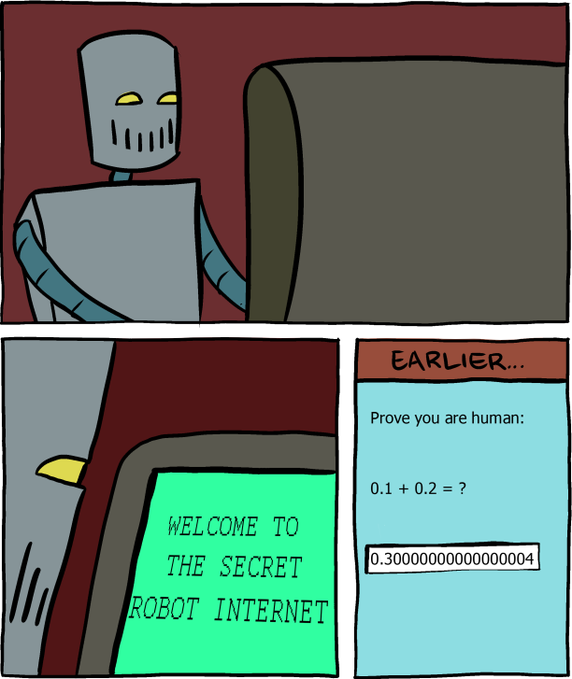

In [ ]:
import ctypes
bin(ctypes.c_uint.from_buffer(ctypes.c_float(0.1)).value)

In [ ]:
format(0.1, '.70f')

In [ ]:
format(0.1, '.17f')

In [ ]:
from decimal import Decimal
Decimal.from_float(0.1)

In [ ]:
from fractions import Fraction
Fraction.from_float(0.1)

In [ ]:
print(len(str(3602879701896397)), len(str(36028797018963968)))

In [ ]:
0.1 == 3602879701896397/36028797018963968

In [ ]:
sum([0.1] * 10) == 1.0

In [ ]:
import math
# mitigate loss-of-precision
# during summation
math.fsum([0.1] * 10) == 1.0

# Lists

Lists are mutable, dynamically typed sequences, and they are used frequently in Python.

In [ ]:
# This is a list
print([1,2,3])

In [ ]:
# We can append to lists
lst = [ 1, 2, 3 ]
lst.append(4)
print(lst)

In [ ]:
# We can index into lists (0-based indexing)
print(lst[2])

In [ ]:
# We can insert, remove, and update
lst.insert(1, 42)
print(lst)

In [ ]:
lst.remove(2)
print(lst)

In [ ]:
del lst[2]
print(lst)

In [ ]:
lst[1] = 43
print(lst)

In [ ]:
# pop() removes and returns the last element
print(lst.pop())

In [ ]:
print(lst)

In [ ]:
# Lists are dynamically typed
lst = [ 'This', 'is', 'a', 'list', ['not', 3.14], 'with', 7, 'elements' ]
lst

In [ ]:
# Lists can be sliced just like strings
lst[::-2]

In [ ]:
mylist1 = list(range(300_000))
mylist2 = []

In [ ]:
%%time
while mylist1:
    item = mylist1.pop()
    mylist2.append(item)

In [ ]:
mylist1 = list(range(300_000))
mylist2 = []

In [ ]:
%%time
while mylist1:
    item = mylist1.pop(0)
    mylist2.append(item)

In [ ]:
print([1,2] * 2)
my_list1 = [[1, 2, 3]] * 2

print('initially ---> ', my_list1)

# modify the 1st element of the 2nd sublist
my_list1[1][0] = 'a'
print("after my_list1[1][0] = 'a' ---> ", my_list1)

In [ ]:
my_list2 = [[1, 2, 3] for i in range(2)]

print('initially:  ---> ', my_list2)

# modify the 1st element of the 2nd sublist
my_list2[1][0] = 'a'
print("after my_list2[1][0] = 'a':  ---> ", my_list2)

In [ ]:
 for a, b in zip(my_list1, my_list2):
    print('id my_list1: {}, id my_list2: {}'.format(id(a), id(b)))

In [ ]:
board = [[0] * 8] * 8 
print(board)

In [ ]:
board[1][1] = 1
print(board)

In [ ]:
board = [[0] * 8 for _ in range(8)]
board[1][1] = 1
print(board)

In [ ]:
my_list = [1, 2, 3, 4, 5]
print(my_list[5])

In [ ]:
my_list = [1, 2, 3, 4, 5]
print(my_list[5:])

In [ ]:
looper = looper[0] = ['a','b']
print(looper[0][0][0][0][0][1])

In [ ]:
my_list = ['a']
my_list.append('b')
my_list.append(my_list)
print(my_list)
print(my_list[2][2][0])

## The consequences of modifying a list when looping through it

It can be really dangerous to modify a list when iterating through it - this is a very common pitfall that can cause unintended behavior

Do not do it!

Look at the following examples, and for a fun exercise: try to figure out what is going on before you skip to the solution!


In [ ]:
a = [1, 2, 3, 4, 5]
for i in a:
    if not i % 2:
        a.remove(i)
print(a)

In [ ]:
b = [2, 4, 5, 6]
for i in b:
     if not i % 2:
         b.remove(i)
print(b)

**The solution** is that we are iterating through the list index by index, and if we remove one of the items in-between, we inevitably mess around with the indexing. Look at the following example and it will become clear:

In [ ]:
b = [2, 4, 5, 6]
for index, item in enumerate(b):
    print(index, item)
    if not item % 2:
        b.remove(item)
print(b)

# Tuples

Tuples are *immutable* sequences.

In [ ]:
# this is a tuple
print((1, 2, 3))

In [ ]:
print ('Tuples', 'are', 'also', 'dynamically', 'typed', 42)

In [ ]:
# Tuples can be indexed
t = (1,2,3)
print(t[0])

In [ ]:
# Tuples can be "unpacked"
x,y = (1,2)
print(x)
print(y)

x = 6
y = ++x
print(y)

# Basic control structures

In [ ]:
if True:
    print('This is true')
else:
    print('This is false')

In [ ]:
x = 0
while x < 5:
    x = x + 1
    print(x)

In [ ]:
lst = [ 1, 2, 3 ]
for x in lst:
    print(x)

In [ ]:
print(range(3))
for x in range(3):
    print(x)

In [ ]:
for x in range(10):
    if x % 2 == 0:
        continue
    if x > 5: break
    print(x)

### Exercises

- Write a function that sums the values in a list using a `for` loop
- Write a function that sums the even-numbered values in a list
- Write a function that returns the reversed version of a list

# Dicts

A *dict* is a hash table (also known as a "dictionary"). Dicts are pervasive in Python.

In [ ]:
print({'key':'value'})

In [ ]:
d = {'key1':1, 'key2':'foo'}
print(d)

In [ ]:
d['key1']

In [ ]:
d['key3'] = 'bar'

In [ ]:
print(d)

In [ ]:
# dicts are unordered, but we can get a list of their keys,
# values, or (key,value) pairs
print(d.keys())

In [ ]:
print(d.values())

In [ ]:
print(d.items())

In [ ]:
# dict keys can be any *immutable* type in Python
d = { 'foo': 1, 2: 'bar' }
print(d)

In [ ]:
d[(1,2)] = 'baz'
print(d)

Items can be removed using del

In [ ]:
del d[2]
print(d)

A `dict` can be iterated through in a space-efficient using `keys`, `values`, and `items`:

In [ ]:
for k in d.keys():
    print(k)

In [ ]:
for v in d.values():
    print(v)

In [ ]:
for k,v in d.items():
    print(k, v)

In [ ]:
'foo' in d # Test for key membership 

## switch in Python

Python 3.10 introduced a new feature under PEP 634 “Switch Case in Python” called “Python Structure Pattern Matching”

In [ ]:
status_code = 400 
match status_code:
    case 400|401|403: 
         print("bad request") 
    case 200: 
        print("good")
    case _:
        print("Something else bad happened") 

## but before...

based on:

Why I don't miss switch-case in Python, but I do love it in Ruby

by Reuven M. Lerner

In [ ]:
def a():
    return "Hello from a!"

def b():
    return "Hello from b!"

user_choices_d = '?'


In [ ]:
while True:
    user_choice = input("Enter choice: ")
    
    if not user_choice:
        break
    elif user_choice in user_choices_d:
        print(user_choices_d[user_choice]())
    else:
        print("No such option {}".format(user_choice))

In [ ]:
def a():
    return "Hello from a!"

def b():
    return "Hello from b!"

user_choices_d = {
    'a':a,
    'b':b
}


# Exceptions

Python handles errors by throwing *exceptions*. For instance, trying to read a non-existent
key in a dict:

In [ ]:
d['does not exist']

To handle exceptions gracefully, we must enclose them in a `try:` *block*:

In [ ]:
try:
    x = d['does not exist']
    print('This statement never executes!')
except KeyError:
    print('There was a key error!')

We can also write code that will *always* run, whether an exception is raised or not:

In [ ]:
try:
    x = d['does not exist']
except KeyError:
    print('There was a key error!')
finally:
    print('This always runs!')

In [ ]:
try:
    x = d['key1']
except KeyError:
    print('There was a key error!'
finally:
    print('This always runs!')

If we want code that only runs when there is *not* an error, we can use the `else:` clause:

In [ ]:
try:
    x = d['key1']
except KeyError:
    print('There was a key error!')
else:
    print('The try: block completed without error.'
finally:
    print('This always runs!')

To *cause* an exception, use the `raise` keyword:

In [ ]:
raise KeyError('This is a key error')

### Exercises

- Write a collection of functions to manage a telephone directory. The directory should be 
  stored in a dict and passed as the first argument to each function. These functions should include
  `add_number(directory, name, number)`, `remove_number(directory, name)`, and 
  `lookup_number(directory, name)`. 
- Update your function so that `remove_number` does not raise an exception when you remove a 
  non-existent entry.

## Next lecture:
- Brandon Rhodes: The Mighty Dictionary (PyCon Atlanta 2010) - https://www.youtube.com/watch?v=rWdF7oW6z18
- Raymond Hettinger: Modern Dictionaries (San Francisco Python 2016) - https://www.youtube.com/watch?v=p33CVV29OG8
